#### Cloning YOLO repository

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
%cd /content/drive/MyDrive/yolov5_object_detection

/content/drive/MyDrive/yolov5_object_detection


In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12219, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 12219 (delta 6), reused 11 (delta 4), pack-reused 12197
Receiving objects: 100% (12219/12219), 12.61 MiB | 8.14 MiB/s, done.
Resolving deltas: 100% (8405/8405), done.


In [2]:
!nvidia-smi

Fri Sep  9 14:36:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 1. installing Dependencies

In [3]:
%cd yolov5

/content/drive/MyDrive/yolov5_object_detection/yolov5


In [4]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

#### 2. Load Model

In [6]:
model = torch.hub.load("ultralytics/yolov5","yolov5s")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-9 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


#### 3. Make Detections with Images

In [7]:
image = "/content/drive/MyDrive/yolov5_object_detection/p_cars_highway_522785736.jpg"

result = model(image)
print(result)

image 1/1: 480x962 21 cars, 6 trucks
Speed: 29.5ms pre-process, 13.9ms inference, 1.8ms NMS per image at shape (1, 3, 320, 640)



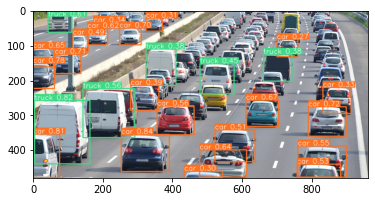

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

#### 4. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    results = model(frame)
    cv2.imshow("YOLO",np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

#### 5. detection with video

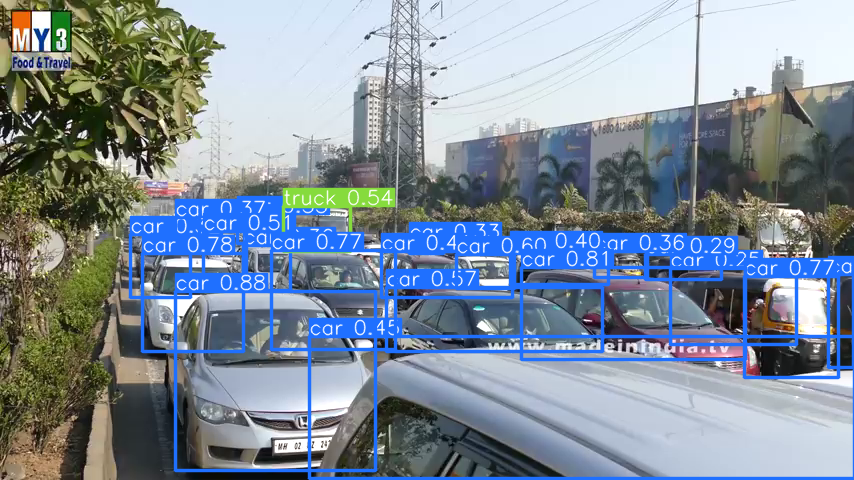

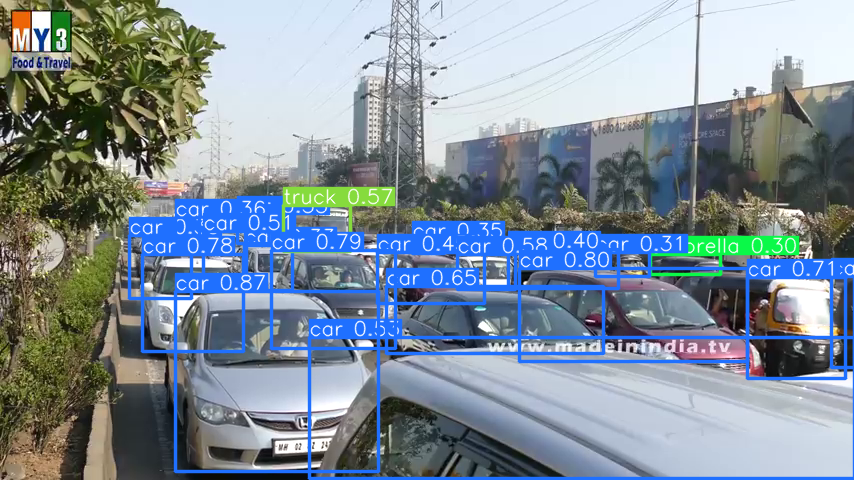

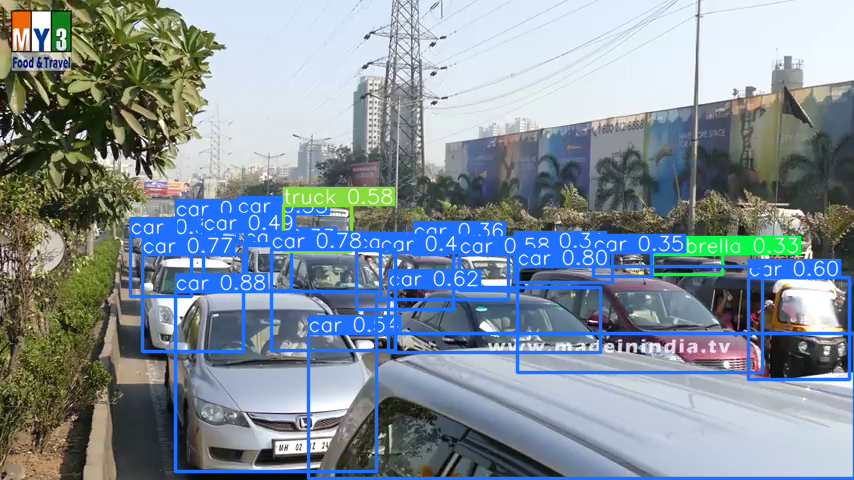

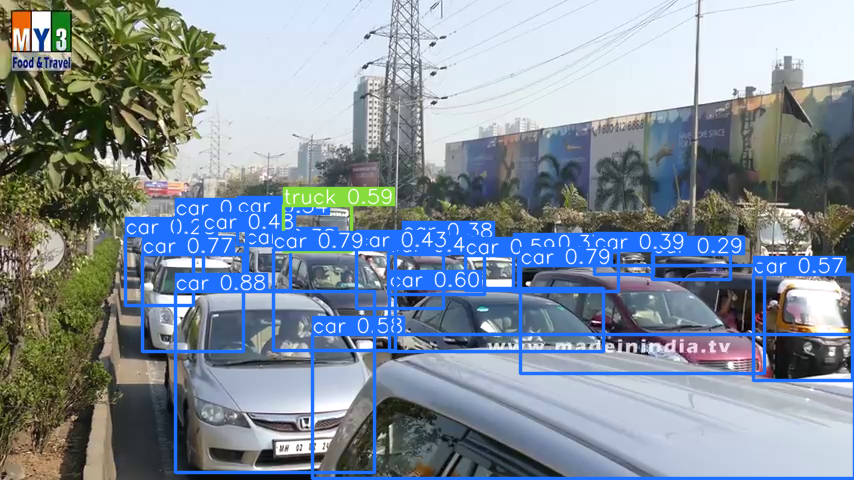

In [ ]:
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture("/content/drive/MyDrive/yolov5_object_detection/mumbai-traffic-india.mp4")
while cap.isOpened():
    ret,frame = cap.read()
    results = model(frame)
    cv2_imshow(np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [16]:
!python train.py --img 320 --batch 32 --epoch 50 --data /content/drive/MyDrive/yolov5_object_detection/vehicles_open_image/data.yaml --weights /content/drive/MyDrive/yolov5_object_detection/yolov5/yolov5s.pt

train: weights=/content/drive/MyDrive/yolov5_object_detection/yolov5/yolov5s.pt, cfg=, data=/content/drive/MyDrive/yolov5_object_detection/vehicles_open_image/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-99-g3cd66b1 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05

## Load Custom Model

In [9]:
custom_model = torch.hub.load("ultralytics/yolov5",path=r"/content/drive/MyDrive/yolov5_object_detection/yolov5/runs/train/exp2/weights/best.pt",model="custom")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-9 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


# Detection with some of the test Data.

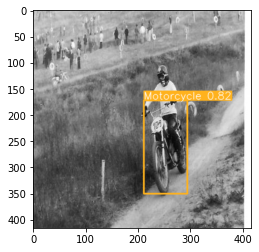

In [10]:
%matplotlib inline
result = custom_model(r"/content/drive/MyDrive/yolov5_object_detection/vehicles_open_image/test/images/10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg")
plt.imshow(np.squeeze(result.render()))
plt.show()

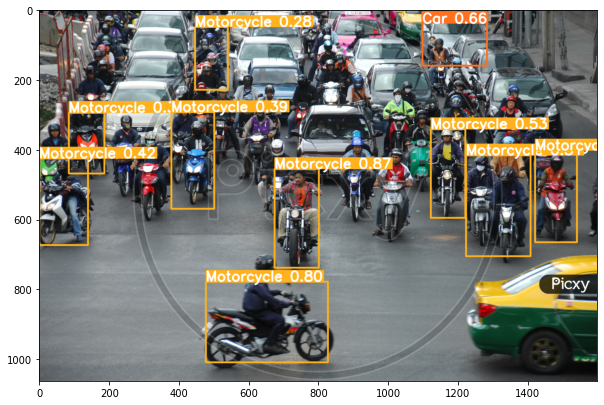

In [14]:
plt.figure(figsize=(10,10))
result = custom_model(r"https://images.picxy.com/cache/2019/11/29/2aeb3ccdf68965d44c87590ccc11fa24.jpg")
plt.imshow(np.squeeze(result.render()))
plt.show()

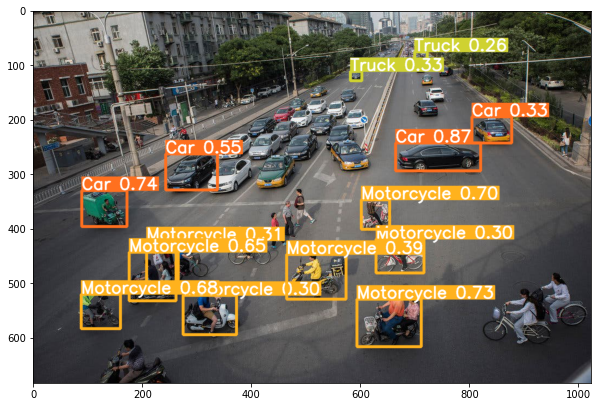

In [13]:
plt.figure(figsize=(10,10))
result = custom_model(r"https://static01.nyt.com/images/2016/05/31/world/xxBEIJINGBIKE1/xxBEIJINGBIKE1-jumbo.jpg?quality=75&auto=webp")
plt.imshow(np.squeeze(result.render()))
plt.show()